In [2]:
!pip install spacy

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [3]:
!pip install en_core_web_sm-3.1.0-py3-none-any.whl

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple
Processing ./en_core_web_sm-3.1.0-py3-none-any.whl
en-core-web-sm is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [4]:
import spacy
import en_core_web_sm

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
import pandas as pd

In [7]:
df_iva_sample = pd.read_csv("s3://adl-core-sagemaker-studio/external/Deepali/query202208-12.csv")

/tmp/ipykernel_1246/1269742681.py:1: DtypeWarning: Columns (36,37,38,41,42,43,44,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iva_sample = pd.read_csv("s3://adl-core-sagemaker-studio/external/Deepali/query202208-12.csv")


In [8]:
df_iva_sample_1 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202201.csv")

/tmp/ipykernel_1246/1666922987.py:1: DtypeWarning: Columns (36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iva_sample_1 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202201.csv")


In [9]:
df_iva_sample_2 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202202-05.csv")

/tmp/ipykernel_1246/2423618519.py:1: DtypeWarning: Columns (36,38,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iva_sample_2 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202202-05.csv")


In [10]:
df_iva_sample_3 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202206.csv")

/tmp/ipykernel_1246/3523077079.py:1: DtypeWarning: Columns (36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iva_sample_3 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202206.csv")


In [11]:
df_iva_sample_4 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202207.csv")

/tmp/ipykernel_1246/3794833382.py:1: DtypeWarning: Columns (36,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iva_sample_4 = pd.read_csv("s3://adl-core-sagemaker-studio/external/IVA/query202207.csv")


In [12]:
df_iva = pd.concat([df_iva_sample, df_iva_sample_1, df_iva_sample_2, df_iva_sample_3, df_iva_sample_4 ], axis = 0)

In [13]:
df_iva = df_iva.drop_duplicates()

In [14]:
df_iva.shape

(11859121, 67)

In [15]:
df_iva = df_iva[['client_id','person_internal_id','input','unit_name','response_text','next_unit_hit','previous_unit_hit','knowledge_category']].drop_duplicates()

In [16]:
df_iva = df_iva.drop_duplicates()

In [17]:
df_iva.shape

(9379811, 8)

In [18]:
df_iva.columns

Index(['client_id', 'person_internal_id', 'input', 'unit_name',
       'response_text', 'next_unit_hit', 'previous_unit_hit',
       'knowledge_category'],
      dtype='object')

In [19]:
words_2 = ['day care', 'creche', 'child care', 
 'nursery', 'nursery school', 'preschool', 'after-school care', 'day nursery', 'infant school', 
 'infant care', 'playschool', 'play-group', 'kindergarten', 'childminding', 'babysitting', 'babysitter', 
 'nanny care', 'children supervision', 'toddler care']

df_iva_cc = df_iva[df_iva['input'].str.contains('|'.join(words_2), case=False, na=False)]

In [20]:
df_iva_cc['category'] = 'Child care'

/tmp/ipykernel_1246/1145258041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iva_cc['category'] = 'Child care'


In [51]:
df_iva_cc.shape

(6450, 9)

In [21]:
df_iva_non_child = df_iva[~df_iva['input'].str.contains('|'.join(words_2), case=False, na=False)][['client_id','person_internal_id','input','next_unit_hit','unit_name','knowledge_category','response_text']].head(df_iva_cc.shape[0])

In [22]:
df_iva_non_child['category'] = 'other'

In [23]:
df_iva_child_non_child_care = pd.concat([df_iva_cc, df_iva_non_child], axis = 0)

In [24]:
df_iva_child_non_child_care = df_iva_child_non_child_care.sample(frac=1, random_state=42)

In [25]:
df_iva_child_non_child_care.shape

(12900, 9)

In [26]:
df_iva_child_non_child_care = df_iva_child_non_child_care.drop_duplicates()

In [27]:
df_iva_child_non_child_care.shape

(12893, 9)

In [28]:
df_iva_child_non_child_care['knowledge_category'].value_counts

<bound method IndexOpsMixin.value_counts of 5268          Technical Units
2970        Health Management
8198            HM-Clarifiers
4241       Technical Behavior
5266       General Clarifiers
                  ...        
5747        Health Management
1936850     Health Management
2337698     Health Management
1377143         HM-Clarifiers
836           Technical Units
Name: knowledge_category, Length: 12893, dtype: object>

In [53]:
def count_intnt_entits(text):
    doc = nlp(text)
    intents = [token.text for token in doc if token.pos_ == 'VERB']
    entities = [token.text for token in doc if token.pos_ in {'NOUN', 'PROPN', 'ADJ', 'NUM', 'ADV'}]
    return len(intents), len(entities)

import re
def clean_text(text):
    clean_text = re.sub(r'[^\w\s]', '', text)
    return clean_text

def extract_ner_entities(sentence):
    doc = nlp(sentence)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

import numpy as np
def length_entities(list_entities):
    if (list_entities==np.nan or list_entities==None or list_entities==''):
        return 0
    else:
        return len(list_entities)
    
# filter_func = lambda x: any(item[1] in ["PERSON", "GPE", "ORG", "LOC", "FAC"] for item in x)
def filter_named_entities(text):
    # Process the text using Spacy
    doc = nlp(text)
    # Filter out named entities (ORG, PERSON, and GPE tags)
    filtered_words = [token.text for token in doc if token.ent_type_ not in ['ORG', 'PERSON', 'GPE', "LOC", "FAC"]]
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [60]:
list_1 = ['ira','RMD','HRdirect','livechat','what is my hsa','P45','Payslip?',
    'sps','F80.2','ub','What is YSA','Paystub please','Sh','mfv','C-128','ax','no is hsa','FormL564','HIS','cif','GreT','YSACard',
    'Heli','RxPCN','403(b)','Hsa yes or no','ypr','Gv','ONA?','What is UHC?','HC-2','uo','what is 4DX?','osh','what is my hsa?',
    'sPRAVATO','sdr','RMD’s','coverage?How','This is for my hsa','pto?','A&DD','childcareplus','fs','mbi','Is that my lowesbenefit.com',
    'hra yes','mri?']
    
def text_preprocess(dataframe, list_1):
    dataframe = dataframe.drop_duplicates()
#     dataframe = dataframe[dataframe['knowledge_category']!='Technical Units']
    dataframe['input_cleaned'] = dataframe.input.fillna('')
    dataframe[['no_of_intents', 'no_of_entities']] = dataframe.input_cleaned.apply(lambda x: pd.Series(count_intnt_entits(x)))  
#     print(dataframe)
    dataframe = dataframe[((dataframe['no_of_intents']>0) & (dataframe['no_of_entities']>0))|(dataframe['input_cleaned'].isin(list_1))]
#     print(dataframe)
    dataframe = dataframe.drop(['no_of_intents','no_of_entities'], axis=1)
#     print(dataframe)
    dataframe = dataframe.drop_duplicates(subset = ['input','input_cleaned','unit_name','response_text','next_unit_hit','previous_unit_hit','knowledge_category'])
#     print(dataframe)
    dataframe['input_cleaned'] = dataframe['input_cleaned'].apply(clean_text)
#     print(dataframe)
    dataframe['ner_enities'] = dataframe['input_cleaned'].apply(extract_ner_entities)
#     print(dataframe)
    dataframe['len_ner_enities'] = dataframe['ner_enities'].apply(length_entities)
#     print(dataframe)
    dataframe3 = dataframe[dataframe['len_ner_enities']>0]
#     print(dataframe)
    dataframe4 = dataframe[dataframe['len_ner_enities']==0]
#     print(dataframe)
#     dataframe5 = dataframe3[~dataframe3["ner_enities"].apply(filter_func)]
    dataframe3["input_cleaned"] = dataframe3["input_cleaned"].apply(filter_named_entities)
#     print(dataframe)
    dataframe6 = pd.concat([dataframe4, dataframe3], axis = 0)
#     print(dataframe)
    dataframe6 = dataframe6.drop(['ner_enities','len_ner_enities'], axis=1)
#     print(dataframe)
    dataframe6['input_changed']=dataframe6['input']!=dataframe6['input_cleaned']
#     df_iva6.to_excel('IVA_all_cat_claened_data.xlsx')
    
    return dataframe6

In [66]:
df_iva_cleaned = text_preprocess(df_iva_child_non_child_care, list_1)

In [68]:
df_iva_cleaned.shape

(4005, 11)

In [69]:
df_iva_cleaned.to_excel('IVA_data_child_care_model.xlsx')

In [70]:
df_iva_cleaned2 = df_iva_cleaned.drop(['input','next_unit_hit','unit_name'], axis=1)

In [71]:
df_iva_cleaned2.head(5)

,client_id,person_internal_id,response_text,previous_unit_hit,knowledge_category,category,input_cleaned,input_changed
8198,1487,481540053,A Dependent Care FSA allows you to set aside b...,AppEvent WelcomeUserFollowUp,HM-Clarifiers,Child care,need copy of child care request reimbursement ...,False
4241,1698,251140059,I can point you in the right direction. Just c...,NaN,Technical Behavior,other,Find Additional Support,False
3619606,1487,384500009,Child Care Plus reimburses eligible employees ...,AppEvent WelcomeUserFollowUp,Health Management,Child care,Am I enrolled in Child Care Plus,False
6462,3979,309100044,Please click on a link below:,NaN,General Clarifiers,other,well how do I change the date,True
3983,936,59171068,"If this benefit is available to you, you can e...",NaN,Health Management,other,I want to get pet insurance,False


In [72]:
df_iva_cleaned2.shape

(4005, 8)

--------

--------

## Building Elder care model

-----

In [73]:
import transformers
import torch
import numpy as np

import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

----

In [74]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
# from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [75]:
# Load the dataset
# Replace `X_train`, `Y_train`, `X_test`, and `Y_test` with your own data
X_train, X_test, Y_train, Y_test = train_test_split(df_iva_cleaned2['input_cleaned'], df_iva_cleaned2['category'], test_size=0.2)

In [76]:
# Encode the labels
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [77]:
# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#distilbert-base-uncased

# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [78]:
# Tokenize the input data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

In [79]:
# Convert the input data into PyTorch tensors
X_train = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
Y_train = torch.tensor(Y_train)
X_test = torch.tensor(test_encodings['input_ids'])
test_masks = torch.tensor(test_encodings['attention_mask'])
Y_test = torch.tensor(Y_test)

In [80]:
# Define the model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(le.classes_))
# model = DistilBertModel.from_pretrained('distilbert-base-uncased', num_labels=len(le.classes_))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [81]:
# Set up the optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 40

In [82]:
# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train.to(device), attention_mask=train_masks.to(device), labels=Y_train.to(device))
    loss = loss_fn(outputs[1], Y_train.to(device))
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test.to(device), attention_mask=test_masks.to(device))
        val_loss = loss_fn(val_outputs.logits, Y_test.to(device))
        print(f"Epoch {epoch}: train_loss={loss:.3f}, val_loss={val_loss:.3f}")


Epoch 0: train_loss=0.697, val_loss=0.679
Epoch 1: train_loss=0.675, val_loss=0.664
Epoch 2: train_loss=0.657, val_loss=0.649
Epoch 3: train_loss=0.637, val_loss=0.634
Epoch 4: train_loss=0.629, val_loss=0.618
Epoch 5: train_loss=0.613, val_loss=0.601
Epoch 6: train_loss=0.596, val_loss=0.583
Epoch 7: train_loss=0.586, val_loss=0.571
Epoch 8: train_loss=0.573, val_loss=0.532
Epoch 9: train_loss=0.537, val_loss=0.479
Epoch 10: train_loss=0.497, val_loss=0.443
Epoch 11: train_loss=0.465, val_loss=0.412
Epoch 12: train_loss=0.432, val_loss=0.375
Epoch 13: train_loss=0.391, val_loss=0.346
Epoch 14: train_loss=0.360, val_loss=0.323
Epoch 15: train_loss=0.326, val_loss=0.294
Epoch 16: train_loss=0.296, val_loss=0.258
Epoch 17: train_loss=0.263, val_loss=0.222
Epoch 18: train_loss=0.231, val_loss=0.182
Epoch 19: train_loss=0.197, val_loss=0.145
Epoch 20: train_loss=0.167, val_loss=0.118
Epoch 21: train_loss=0.144, val_loss=0.102
Epoch 22: train_loss=0.124, val_loss=0.092
Epoch 23: train_loss=

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Get the model's predictions for the test set
with torch.no_grad():
    test_outputs = model(X_test.to(device), attention_mask=test_masks.to(device))
    test_preds = np.argmax(test_outputs.logits.detach().cpu().numpy(), axis=1)

# Create the confusion matrix
confusion = confusion_matrix(Y_test, test_preds)

print("Confusion matrix:")
print(confusion)

Confusion matrix:
[[523  14]
 [  0 264]]


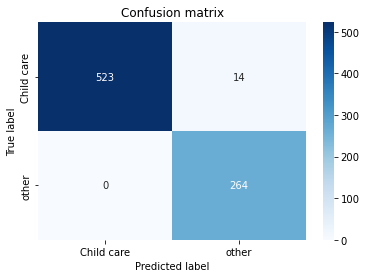

In [85]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [52]:
# Save the model
# 40 epochs model
torch.save({
            'epoch': epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': 0.002,
            'val_loss': 0.019,
            }, '40_epochs_childcare_model.pth')

In [85]:
# Save the model
# 25 epochs model
# torch.save({
#             'epoch': epochs,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'train_loss': 0.005,
#             'val_loss': 0.010,
#             }, '25epoch_model.pth')

In [246]:
# Load the model
# checkpoint = torch.load('model.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# train_loss_history = checkpoint['train_loss']
# val_loss_history = checkpoint['val_loss']
# hyperparams = checkpoint['hyperparams']